In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
tt = TweetTokenizer()
from collections import Counter
from string import punctuation
import numpy as np
matplotlib.rcParams.update({'figure.autolayout': True})

In [2]:
df = pd.read_csv('tablita.csv')

In [3]:
df['historia_clinica'] = df['historia_clinica'].str.replace(',',' ')
df ['historia_clinica']= df['historia_clinica'].str.replace(' S. ',' sindrome ')

In [4]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [5]:
remove_words = ['paciente','pacientes','gen','secuenciacion','molecular','tipo']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['historia_clinica'] = df['historia_clinica'].str.replace(pat,' ')

In [6]:
df['historia_clinica']

0       con cuadro clinico compatible con crisis feb...
1     sospecha craneosinostosis por abombamiento fro...
2     tumor maligno de retina    sin riesgo cardiova...
3       con crisis compulsivas  con crisis donde hub...
4     prueba para el complejo de esclerosis tuberosa...
5     sindrome de hipermovilidad  miopia degenerativ...
6                                     fibrosis quistica
7     distrofia muscular progresiva en estudio duche...
8                                     fibrosis qusitica
9       con evidencia de retinoblatoma bilateral  co...
10                 agamaglobulinemia hereditaria bruton
11    sospecha de enfermedad rara  con retraso del n...
12                                  cáncer de seno t3\n
13                   estudio   de esclerosis tuberosa\n
14    sospecha de pseudoacondroplasia    con acortam...
15      con antecedentes de enfermedad metabolica no...
16                        epilepsia mioclonica severa\n
17      con 2 hijos fallecidos en periodo neonat

In [7]:
df = df.rename(columns={'historia_clinica': 'HC'})

In [8]:
df1 = df[['id','HC']]

In [9]:
df1.head()

,id,HC
0,1,con cuadro clinico compatible con crisis feb...
1,2,sospecha craneosinostosis por abombamiento fro...
2,3,tumor maligno de retina sin riesgo cardiova...
3,4,con crisis compulsivas con crisis donde hub...
4,5,prueba para el complejo de esclerosis tuberosa...


In [10]:
df1.to_csv('hc.csv', index = False)

In [11]:
df2 = pd.read_csv('hc.csv')

In [12]:
top_N = 30

In [13]:
txt = df2.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [24]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Términos', 'Frecuencias']).set_index('Términos')
rslt.head()

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


,Frecuencias
Términos,
sindrome,16
cancer,13
seno,10
sospecha,10
anos,9


In [25]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=[True])

In [26]:
frecuencias.head()

,Frecuencias
Términos,
retardo,4
1,4
tuberosa,4
analisis,4
esclerosis,4


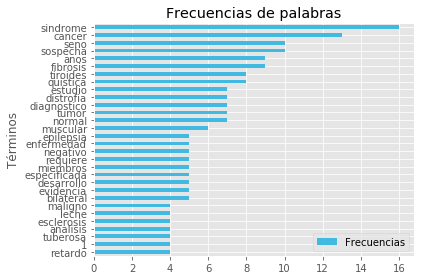

In [27]:
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')]);
fig = plot.get_figure();
fig.savefig("frecuecias.png", bbox_inches=0)

In [28]:
idf = pd.read_csv('idffrecuencias.csv') #calculado con R

In [30]:
idf.columns = ['t', 'TFIDF', 'Términos']

In [32]:
idf = idf[['Términos','TFIDF']]
idf.head()

,Términos,TFIDF
0,derecho,18.259138
1,infiltrante,18.259138
2,manchas,18.449241
3,evidencia,19.139095
4,enfermedad,19.139095


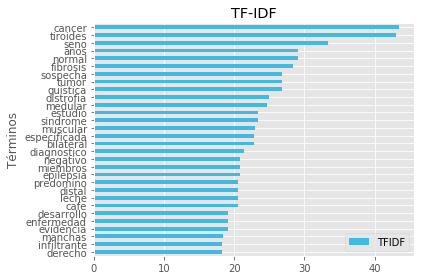

In [33]:
plot = idf.plot(kind="barh", x = 'Términos', title = 'TF-IDF' , color = [('#41b9e1')]);
fig = plot.get_figure();
fig.savefig("TFIDF.png", bbox_inches=0)

In [34]:
idf1 = pd.read_csv('idffrecuencias1.csv') #calculado con R

In [36]:
idf1 = idf1.rename(columns={'Unnamed: 0': 'DOC'})
del idf1['DOC']
idf1.head()

,canalopatiasindromeconsidera,clinico,compatible,consentimiento,crisis,cuadro,dravet,febriles,informado,plus,...,ambos,especifica,senos,brazos,ehlersdanlos,hiperelasticidad,hiperextension,luxables,marcada,piernas
0,6.149747,5.149747,6.149747,4.564785,5.149747,5.149747,6.149747,6.149747,4.564785,6.149747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,4.564785,0.000000,0.000000,0.000000,0.000000,4.564785,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,4.564785,0.000000,0.000000,0.000000,0.000000,4.564785,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,10.299494,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
mean_idf = idf1.mean(0)

In [38]:
mean_idf.head()

canalopatiasindromeconsidera    0.086616
clinico                         0.145063
compatible                      0.086616
consentimiento                  0.192878
crisis                          0.217595
dtype: float64

In [39]:
resta = idf1 - mean_idf

In [40]:
norma = np.sqrt(np.diag(np.dot(resta.T, resta))) #calculo de la norma

Se calcula a partir de multiplicar la matriz transpuesta por si misma, esto proporciona una matriz cuadrada cuya diagonal esta formada por las normas al cuadrado, la raiz cuadrada de esta diagonal corresponde al vector de las normas de los campos de la matriz.

In [41]:
normalizado = resta/norma

In [43]:
normalizado

,canalopatiasindromeconsidera,clinico,compatible,consentimiento,crisis,cuadro,dravet,febriles,informado,plus,...,ambos,especifica,senos,brazos,ehlersdanlos,hiperelasticidad,hiperextension,luxables,marcada,piernas
0,0.992933,0.697076,0.992933,0.565021,0.433852,0.697076,0.992933,0.992933,0.565021,0.992933,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
1,-0.014185,-0.020205,-0.014185,0.565021,-0.019141,-0.020205,-0.014185,-0.014185,0.565021,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
2,-0.014185,-0.020205,-0.014185,0.565021,-0.019141,-0.020205,-0.014185,-0.014185,0.565021,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
3,-0.014185,-0.020205,-0.014185,-0.024927,0.886845,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
4,-0.014185,-0.020205,-0.014185,-0.024927,-0.019141,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
5,-0.014185,-0.020205,-0.014185,-0.024927,-0.019141,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
6,-0.014185,-0.020205,-0.014185,-0.024927,-0.019141,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
7,-0.014185,-0.020205,-0.014185,-0.024927,-0.019141,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
8,-0.014185,-0.020205,-0.014185,-0.024927,-0.019141,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185
9,-0.014185,-0.020205,-0.014185,-0.024927,-0.019141,-0.020205,-0.014185,-0.014185,-0.024927,-0.014185,...,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185,-0.014185


In [69]:
comprobacion = np.sqrt(np.diag(np.dot(normalizado.T, normalizado))) # Comprobacion de la normlizacion......
c = pd.DataFrame(comprobacion)
c.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
